# M8 - TP 3 : Statistiques bivariées

## Objectif

Le but de ce TP est de mettre en oeuvre des statistiques opérant sur deux variables de qualités différentes (nature/continue, et quantitative/qualitative).

Pour cela, nous utiliserons les tableaux de contingence et la distance du $\chi_2$ ainsi que les coefficients de corrélation.

### Compétences associées :

| Numéro        | Compétence           | 
|:------------- |:--------------------:|
|AS201|	Connaître la définition d’un tableau de contingence|
|AS202|	Être capable de calculer les éléments d'un tableau de contingence|
|AS203| Savoir mesurer la dépendance linéaire de deux variable en calculant le coefficient de corrélation|
|AS204|	Connaître les propriétés du coefficient de corrélation|
|AS205|	Savoir analyser un coefficient de corrélation|
|AS206|	Connaître la définition de la distance du $\chi_2$|
|PY103|	Être capable d’afficher un ensemble de nuage de points entre deux variables|
|PY201|	Être capable de calculer un tableau de contingence de deux suites de données|
|PY202|	Être capable de calculer le coefficient de corrélation entre deux variables quantitatives|
|PY203|	Être capable de calculer la distance du $\chi_2$ de deux variables qualitatives|


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Sudoku

Nous avons le tableau de contingence incomplet suivant :

\begin{array}{|c||c|c|c||c|}
\hline
 X \setminus Y & y_1 = 1 & y_2 = 2 & y_3 = 8 & \text{Marginal de }X\ \mathbb{P}(X) \\
 \hline \hline
 x_1 &0.1 &   &    &    \\
 \hline
 x_2 &    &   &    &    \\
 \hline\hline
 \text{Marginal de } Y\ \mathbb{P}(Y) &0.3&    &    &1   \\
 \hline
\end{array}

De plus, nous disposons de l’information suivante :
\begin{equation}
     \mathbb{P}(Y = y_1 |X = x_2) = \frac{1}{2}
\end{equation}

\begin{equation}
     \mathbb{P}(Y = y_3 |X = x_1) = \frac{1}{2}
\end{equation}

\begin{equation}
     \mathbb{E}(Y|X = x_2) = \frac{3}{2}
\end{equation}

1\. Compléter le tableau de contingence
**Astuce**: Pour le calculer le plus rapidement, suivez l'ordre suivant :

\begin{array}{|c||c|c|c||c|}
\hline
 X \setminus Y & y_1 = 1 & y_2 = 2 & y_3 = 8 & \text{Marginal de }X\ \mathbb{P}(X) \\
 \hline \hline
 x_1 &0.1 & \textbf{5}  & \textbf{4}   &  \textbf{3}  \\
 \hline
 x_2 &  \textbf{1}  &  \textbf{6} &  \textbf{7}  &  \textbf{2}  \\
 \hline\hline
 \text{Marginal de } Y\ \mathbb{P}(Y) &0.3&  \textbf{8}  &  \textbf{9}  &1   \\
 \hline
\end{array}


De plus, les variables **6 et 7** s'obtiennent en résolvant un système de deux équations à deux inconnues

\begin{array}{|c||c|c|c||c|}
\hline
 X \setminus Y & y_1 = 1 & y_2 = 2 & y_3 = 8 & \text{Marginal de }X\ \mathbb{P}(X) \\
 \hline \hline
 x_1 &0.1 &  0.2 & 0.3   &  0.6  \\
 \hline
 x_2 &  0.2  & 0.2   &  0.0   & 0.4   \\
 \hline\hline
 \text{Marginal de } Y\ \mathbb{P}(Y) &0.3&  0.4  &  0.3   &1   \\
 \hline
\end{array}

### Les variables $X$ et $Y$ sont elles indépendantes 
1. Calculez le tableau théorique sous l'hypothèse d'indépendance

In [2]:
cont_table = [[0.1, .2 , .3],
              [.2, 0.2, 0.0]]

pro_col = np.sum(cont_table, axis=0)
pro_lignes = np.sum(cont_table, axis=1)

p_indep = np.outer(pro_lignes, pro_col)
print(p_indep)

[[0.18 0.24 0.18]
 [0.12 0.16 0.12]]


2. Calculez la distance du $\chi_2$ à partir du tableau de contingence et du tableau théorique

In [3]:
print(np.sum(((cont_table - p_indep )**2 )/ p_indep))


0.30555555555555547


3. Vérifiez que vous obteniez bien la même chose avec scipy. 

NB : jetez un oeil à la doc de `chi2_contingency` du module scipy.stats

In [4]:
# calcul du chi 2
from scipy.stats import chi2_contingency
chi2, p, dof, ex  = chi2_contingency(cont_table)
print(chi2)
print(ex)

0.30555555555555547
[[0.18 0.24 0.18]
 [0.12 0.16 0.12]]


# Réchauffement climatique


1. Le code ci dessous permet de charger les émissions de CO2 ainsi que la température globale de la Terre. Les données sont issues de https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions#co2-and-greenhouse-gas-emissions-country-profiles.
Essayez de les récupérer et de les traiter par vous mêmes. Sinon reprenez le code ci dessous.

Quelle est la nature des variables ?

In [5]:
import csv
import numpy as np

#https://ourworldindata.org/co2-and-other-greenhonuse-gas-emissions#co2-and-greenhouse-gas-emissions-country-profiles

tmp = []
min_year = 1900

with open('co-emissions-per-capita.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Entity'] == 'World':
            if int(int(row['Year']
                      ) >= min_year):
                tmp.append([float(row['Per capita CO2 emissions'])])
data_co2 = np.array(tmp)

tmp = []
with open('temperature-anomaly.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['Entity'] == 'Global':
            if int(int(row['Year']) >= min_year):
                tmp.append([float(row['Median temperature anomaly from 1961-1990 average'])])
data_temp = np.array(tmp)

np.savez('data_global_warming.npz', co2=data_co2, temp=data_temp)
# 2 continues

On a deux variables continues

2. Faites un résumé graphique du couple de variable sous forme d'un nuage de points

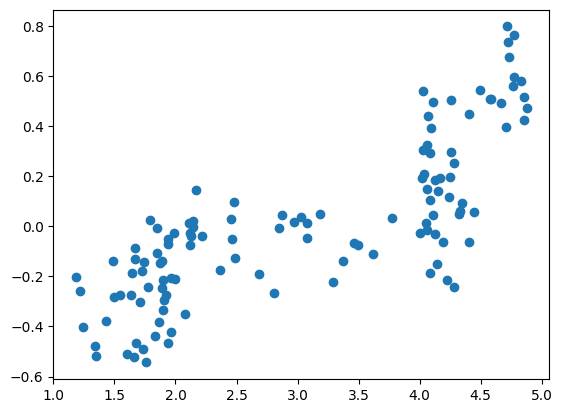

In [6]:
plt.scatter(data_co2,data_temp)

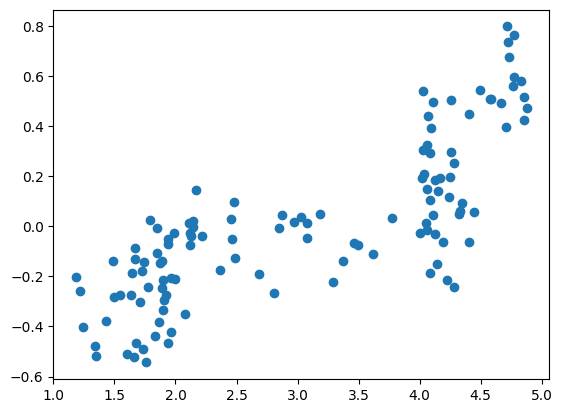

In [7]:
plt.plot(data_co2,data_temp,'o')

3. Utilisez un bon indicateur quantitatif pour vous donner une idée si les deux variables sont dépendantes.

In [8]:
# à la main
n = len(data_co2)
mean_x = np.mean(data_co2)
mean_y = np.mean(data_temp)

std_x = np.std(data_co2)
std_y = np.std(data_temp)
corr = 1/n * np.sum((data_co2 - mean_x)*(data_temp - mean_y))
corr = corr / (std_x*std_y)
print(corr)

0.7891945050542626


In [9]:
#avec numpy 
np.corrcoef(data_co2.T, data_temp.T)

array([[1.        , 0.78919451],
       [0.78919451, 1.        ]])

0.8 -> corrélé

## Matrices de contingence sur données réelles

1\. Récupérer le fichier DataExo1.mat sur Moodle.

Les détails sur ces données sont disponibles https://archive.ics.uci.edu/ml/datasets/Student+Performance. Ces données décrivent les résultats des élèves dans l’enseignement secondaire de deux écoles portugaises.

In [10]:
import scipy.io as sio 
mat = sio.loadmat("DataExo1.mat")

2\. On commence par s’intéresser aux deux premières variables qui codent pour l’école $x$ et le genre $g$ de la personne interviewée.

In [11]:
x = mat["DataExo1"][:, 0]
g = mat["DataExo1"][:, 1]
n=len(x)

3\. Construisez le tableau de contingence $O$ entre les variables $x$ et $g$

In [12]:
O = np.zeros((2,2))
O[0,0] = np.sum(np.logical_and((x == 0), (g == 0)))
O[0,1] = np.sum(np.logical_and((x == 0), (g == 1)))
O[1,0] = np.sum(np.logical_and((x == 1), (g == 0)))
O[1,1] = np.sum(np.logical_and((x == 1), (g == 1)))
O

array([[166., 183.],
       [ 21.,  25.]])

In [13]:
from sklearn.metrics.cluster import contingency_matrix

O =  contingency_matrix(x, g)
O

array([[166, 183],
       [ 21,  25]])

4\. Construisez le tableau théorique associé en supposant l’indépendance des deux variables.

In [14]:
M1 = np.sum(O, axis=0)
Mc = np.sum(O, axis=1)
T = np.outer(M1, Mc).T / n
T

array([[165.22278481, 183.77721519],
       [ 21.77721519,  24.22278481]])

5\. Calculez la distance du $\chi_2$ entre les variables $x$ et $g$. Ces deux variables sont elles liées ou sont elles indépendantes ?

In [15]:
D2 = np.sum(np.sum((O - T)**2/T))
D2
# Donné juste la valeur du chi2, cela est difficile à interpréter: on relira cette grandeur aux tests statistiques en 3eme partie du cours
# Ceci étant dit, cette valeur est petite, donc on peut supposer une indépendance.

0.059619131674428574

6\.Vérifiez que la fonction chi2_contingency de scipy.stats fait bien la même chose

In [16]:
from scipy.stats import chi2_contingency

chi2_contingency(O, correction=False)

Chi2ContingencyResult(statistic=0.059619131674428574, pvalue=0.8070989340873198, dof=1, expected_freq=array([[165.22278481, 183.77721519],
       [ 21.77721519,  24.22278481]]))

7\. On s’intéresse maintenant à la septième variable $Me$ qui code le niveau d’éducation des mère de la manière suivante :

    * 0 - none,
    * 1 - primary education (4th grade),
    * 2 - 5th to 9th grade,
    * 3 - secondary education
    * 4 - higher education

Récupérez cette variable et calculez les effectifs de chacune des modalités. Qu’en concluez vous ?

In [17]:
Me = mat["DataExo1"][:, 6]
mod, eff = np.unique(np.sort(Me), return_counts=True)
n = len(Me)
print(mod)
print(eff)
print(np.unique(x))

[0 1 2 3 4]
[  3  59 103  99 131]
[0 1]


Peu d'effectifs pour la premiere modalité => on fusionne 0 et 1

8\. Construisez le tableau de contingence N entre les variables $x$ et $Me$

In [18]:
N = np.zeros((2,4))
for xi,mi in zip(x,Me):
    if (mi==0 or mi==1): #on fusionne les deux premières colonnes car les effectifs ne sont pas assez importants
        N[xi,0] +=  1
    else:
        N[xi,mi-1] +=  1
print(N)

[[ 45.  96.  88. 120.]
 [ 17.   7.  11.  11.]]


9\. Construisez le tableau théorique associé en supposant l’indépendance des deux variables.

In [19]:
M1 = np.sum(N, axis=0)
Mc = np.sum(N, axis=1)
T = np.outer(Mc, M1) / len(Me)
T

array([[ 54.77974684,  91.00506329,  87.47088608, 115.7443038 ],
       [  7.22025316,  11.99493671,  11.52911392,  15.2556962 ]])

10\. Calculez la distance du $\chi_2$ entre les variables $x$ et $Me$. Ces deux variables $x$ et $Me$ sont elles liées ou sont elles indépendantes ? Que peut on en déduire sur le choix de l’école ?

In [20]:
D2 = np.sum(np.sum((N - T)**2/T))
D2
#Ici la distance est bien plus grande, donc probablement que les deux variables sont liées.

18.71777905171603